## Linear & Generalized Linear Models
## 3. Ridge Classifier

In [4]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

In [5]:
# Convert the specified columns to categorical
Dataset_Train['stress_level'] = Dataset_Train['stress_level'].astype('category')

# Verify the changes
print(Dataset_Train[['stress_level']].dtypes)
# Convert the specified columns to categorical
Dataset_Test['stress_level'] = Dataset_Test['stress_level'].astype('category')

# Verify the changes
print(Dataset_Test[['stress_level']].dtypes)

stress_level    category
dtype: object
stress_level    category
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined an

✅ Train Accuracy: 0.715
✅ Test Accuracy: 0.705

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.00      0.00      0.00        87
     healthy       0.71      0.99      0.83       427

    accuracy                           0.70       600
   macro avg       0.18      0.25      0.21       600
weighted avg       0.51      0.70      0.59       600



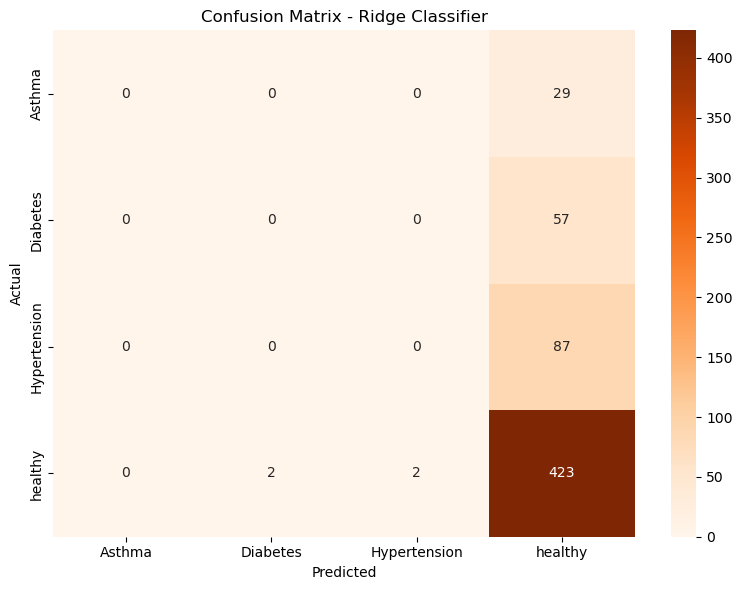

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 1. Prepare features and target
# ================================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ================================================
# 2. Identify numeric and categorical columns
# ================================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ================================================
# 3. Preprocessing pipeline (dense output required)
# ================================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# ================================================
# 4. Transform data
# ================================================
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ================================================
# 5. Encode target variable
# ================================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ================================================
# 6. Train Ridge Classifier
# alpha controls the regularization strength
# ================================================
ridge_model = RidgeClassifier(alpha=1.0, random_state=42)
ridge_model.fit(X_train_processed, y_train_encoded)

# ================================================
# 7. Predictions
# ================================================
y_train_pred = le.inverse_transform(ridge_model.predict(X_train_processed))
y_test_pred = le.inverse_transform(ridge_model.predict(X_test_processed))

# ================================================
# 8. Evaluation
# ================================================
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ================================================
# 9. Confusion Matrix
# ================================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Ridge Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import recall_score, f1_score

# ================================================
# 🔍 Additional Evaluation Metrics
# ================================================

# Sensitivity (Recall)
train_sensitivity = recall_score(y_train, y_train_pred, average='weighted')
test_sensitivity = recall_score(y_test, y_test_pred, average='weighted')

# F1 Score
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("🔹 Additional Performance Metrics 🔹")
print(f"✅ Train Sensitivity (Recall): {train_sensitivity:.4f}")
print(f"✅ Test Sensitivity (Recall):  {test_sensitivity:.4f}")
print(f"✅ Train F1 Score:             {train_f1:.4f}")
print(f"✅ Test F1 Score:              {test_f1:.4f}")


🔹 Additional Performance Metrics 🔹
✅ Train Sensitivity (Recall): 0.7150
✅ Test Sensitivity (Recall):  0.7050
✅ Train F1 Score:             0.6021
✅ Test F1 Score:              0.5885


## With SMOTE

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Before SMOTE: {3: 1711, 2: 347, 1: 226, 0: 116}
✅ After SMOTE: {3: 1711, 2: 1711, 1: 1711, 0: 1711}
✅ Train Accuracy: 0.48188194038573934
✅ Test Accuracy: 0.22333333333333333

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.04      0.24      0.07        29
    Diabetes       0.12      0.37      0.18        57
Hypertension       0.17      0.28      0.21        87
     healthy       0.77      0.19      0.31       427

    accuracy                           0.22       600
   macro avg       0.27      0.27      0.19       600
weighted avg       0.58      0.22      0.27       600



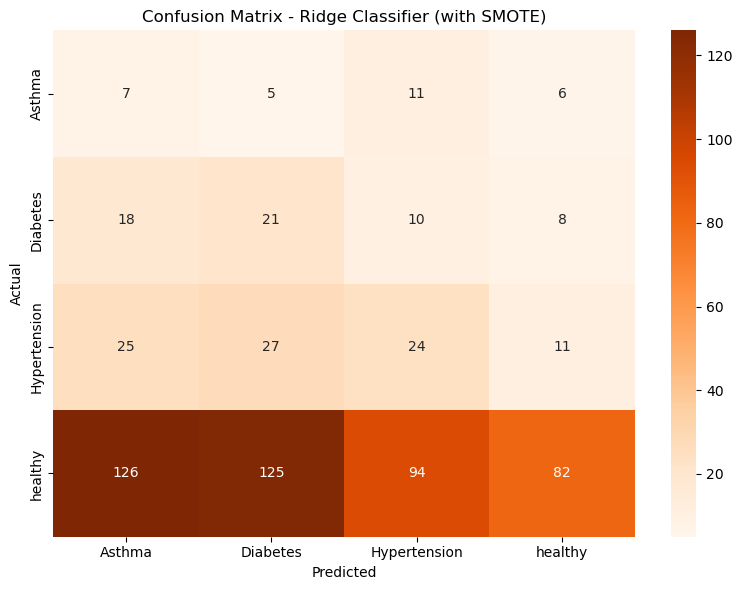

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1️⃣ Prepare Features and Target
# ==========================================
X_train = Dataset_Train.drop(columns=['health_condition'])
y_train = Dataset_Train['health_condition']
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']

# ==========================================
# 2️⃣ Identify column types
# ==========================================
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# ==========================================
# 3️⃣ Preprocessing (Scaling + OneHotEncoding)
# ==========================================
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Fit & transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ==========================================
# 4️⃣ Encode target variable
# ==========================================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ==========================================
# 5️⃣ Apply SMOTE (only on training data)
# ==========================================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_encoded)

print("✅ Before SMOTE:", dict(pd.Series(y_train_encoded).value_counts()))
print("✅ After SMOTE:", dict(pd.Series(y_train_resampled).value_counts()))

# ==========================================
# 6️⃣ Train Ridge Classifier
# ==========================================
ridge_clf = RidgeClassifier(alpha=1.0, random_state=42)
ridge_clf.fit(X_train_resampled, y_train_resampled)

# ==========================================
# 7️⃣ Predictions
# ==========================================
y_train_pred = le.inverse_transform(ridge_clf.predict(X_train_resampled))
y_test_pred = le.inverse_transform(ridge_clf.predict(X_test_processed))

# ==========================================
# 8️⃣ Evaluation
# ==========================================
print("✅ Train Accuracy:", accuracy_score(le.inverse_transform(y_train_resampled), y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# ==========================================
# 9️⃣ Confusion Matrix (Test Set)
# ==========================================
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Ridge Classifier (with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
